In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
sun_data = pd.read_csv('./data/UN_data.csv')

In [11]:
sun_data.shape

(5, 36)

In [12]:
sun_data.head()

,Country or Territory,Station Name,WMO Station Number,National Station Id Number,Period,Element-Statistic Qualifier Code,Statistic Description,Unit,Jan,Jan Footnotes,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,LUXEMBOURG,LUXEMBOURG,6590.0,NaN,1961-1990,NaN,Percent of Possible,*,16.7,NaN,...,33.0,NaN,20.7,NaN,17.2,NaN,35.9,NaN,-9999.9,1.0
1,LUXEMBOURG,LUXEMBOURG,6590.0,NaN,1961-1990,NaN,Mean Number of Hours,*,43.9,NaN,...,108.9,NaN,55.5,NaN,42.8,NaN,1630.2,NaN,1630.2,NaN
2,SINGAPORE,SINGAPORE/CHANGI,48698.0,NaN,1961-1990,NaN,Mean Number of Hours,*,172.4,NaN,...,155.2,NaN,129.6,NaN,133.5,NaN,2022.4,NaN,2022.4,NaN
3,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,code for missing value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
is_mean_nbr_hours = sun_data['Statistic Description'] == 'Mean Number of Hours'
sun_data = sun_data[is_mean_nbr_hours].copy()

In [21]:
relevant_data = ['Country or Territory', 'Period', 'Statistic Description', 
                 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']
sun_data = sun_data[relevant_data]
sun_data

,Country or Territory,Period,Statistic Description,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1,LUXEMBOURG,1961-1990,Mean Number of Hours,43.9,81.2,117.6,164.1,206.4,210.0,232.9,208.3,158.6,108.9,55.5,42.8,1630.2
2,SINGAPORE,1961-1990,Mean Number of Hours,172.4,183.2,192.7,173.6,179.8,177.7,187.9,180.6,156.2,155.2,129.6,133.5,2022.4


In [48]:
sun_plot_data = sun_data.melt(id_vars=['Country or Territory', 'Period', 'Statistic Description'], 
        var_name="Month", 
        value_name="Value")
sun_plot_data

,Country or Territory,Period,Statistic Description,Month,Value
0,LUXEMBOURG,1961-1990,Mean Number of Hours,Jan,43.9
1,SINGAPORE,1961-1990,Mean Number of Hours,Jan,172.4
2,LUXEMBOURG,1961-1990,Mean Number of Hours,Feb,81.2
3,SINGAPORE,1961-1990,Mean Number of Hours,Feb,183.2
4,LUXEMBOURG,1961-1990,Mean Number of Hours,Mar,117.6
5,SINGAPORE,1961-1990,Mean Number of Hours,Mar,192.7
6,LUXEMBOURG,1961-1990,Mean Number of Hours,Apr,164.1
7,SINGAPORE,1961-1990,Mean Number of Hours,Apr,173.6
8,LUXEMBOURG,1961-1990,Mean Number of Hours,May,206.4
9,SINGAPORE,1961-1990,Mean Number of Hours,May,179.8


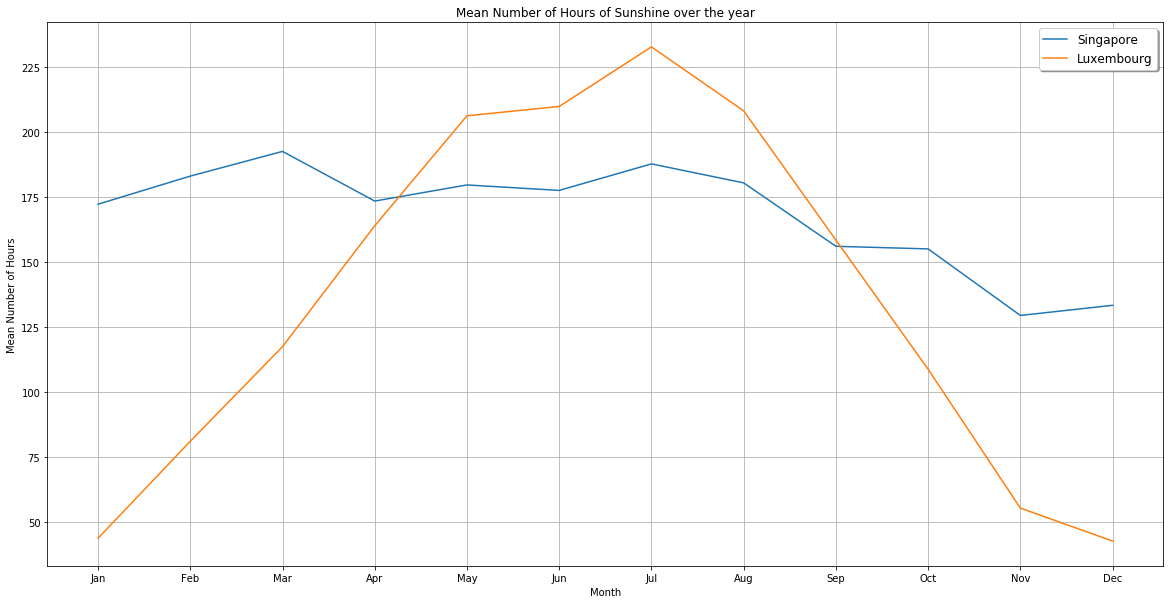

In [57]:
is_luxembourg = sun_plot_data['Country or Territory'].str.contains("LUX")
is_singapore = sun_plot_data['Country or Territory'].str.contains("SING")

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Mean Number of Hours of Sunshine over the year")
ax.set_xlabel("Month")
ax.set_ylabel("Mean Number of Hours")

ax.plot(sun_plot_data[is_singapore][:12]['Month'], sun_plot_data[is_singapore][:12]['Value'], label="Singapore")
ax.plot(sun_plot_data[is_luxembourg][:12]['Month'], sun_plot_data[is_luxembourg][:12]['Value'], label="Luxembourg")

legend = plt.legend(loc = 'upper right', shadow=True, prop={'weight':'roman','size':'large'})
plt.grid()
plt.show()

In [68]:
main_data = pd.read_csv('./data/Indicators.csv')
main_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [92]:
# countries
is_singapore = main_data['CountryName'] == "Singapore"
is_luxembourg = main_data['CountryName'] == "Luxembourg"

is_narrowed =  is_singapore | is_luxembourg

narrowed_data = main_data[is_narrowed].copy()

# indicators
is_power_consumption = narrowed_data['IndicatorName'] == 'Electric power consumption (kWh per capita)'
is_population = narrowed_data['IndicatorName'] == 'Population, total'

# Time span
is_1990 = narrowed_data['Year'] == 1990

country_consumption = narrowed_data[is_power_consumption & is_1990].merge(narrowed_data[is_population & is_1990], on=['Year', 'CountryName'])
country_consumption['Total'] = country_consumption['Value_x'] * country_consumption['Value_y']
recent_data = country_consumption[['CountryName', 'Year', 'Value_y', 'Total']]
recent_data.columns = ['Country', 'Year', 'Population', 'Total Electric Consumption']

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Mean Number of Hours of Sunshine over the year")
ax.set_xlabel("Electric power consumption")
ax.set_ylabel("Mean Number of Hours")


ax.bar(, label="Singapore")
ax.bar(, label="Luxembourg")

legend = plt.legend(loc = 'upper right', shadow=True, prop={'weight':'roman','size':'large'})
plt.grid()
plt.show()

,Country,Year,Population,Total Electric Consumption
0,Luxembourg,1990,381850.0,5.219000e+09
1,Singapore,1990,3047100.0,1.518400e+10
